In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
import matplotlib.axis as axs

In [2]:
df_purchase = pd.read_csv('purchase data.csv')
scaler = pickle.load(open('scalar.pickle','rb'))
pca = pickle.load(open('pca.pickle','rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
df_purchase_segm_std_pca = pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_std_pca)
df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca,prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)
df_pa = df_purchase_predictors

In [5]:
Y = df_pa['Incidence']
X = pd.DataFrame()
X['Mean Price']=(df_pa['Price_1']+df_pa['Price_2']+df_pa['Price_3']+df_pa['Price_4']+df_pa['Price_5'])/5
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
model_purchase.coef_

array([[-2.34794337]])

In [7]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [8]:
brand_choice = df_pa[df_pa['Incidence']==1]
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,2,0,0,1,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,2,0,0,1,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,2,0,0,1,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,2,0,0,1,0


In [9]:
Y = brand_choice['Brand']
features = ['Price_1','Price_2','Price_3','Price_4','Price_5']
X = brand_choice[features]
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coef = ['coef brand 1','coef brand 2','coef brand 3','coef brand 4','coef brand 5']
bc_coef.columns = [coef]
brands = ['brand 1','brand 2','brand 3','brand 4','brand 5',]
bc_coef.index = [brands]
bc_coef = bc_coef.round(2)
bc_coef

,coef brand 1,coef brand 2,coef brand 3,coef brand 4,coef brand 5
brand 1,-3.92,1.27,1.62,0.57,0.44
brand 2,0.66,-1.88,0.56,0.40,0.26
brand 3,2.42,-0.21,0.50,-1.40,-1.31
brand 4,0.70,-0.21,1.04,-1.25,-0.29
brand 5,-0.20,0.59,0.45,0.25,-1.09


In [13]:
price_range = np.arange(0.5,3.5,.01)


df_own_brand_2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_2['price 1'] = brand_choice['Price_1'].mean()
df_own_brand_2['price 2'] = price_range
df_own_brand_2['price 3'] = brand_choice['Price_3'].mean()
df_own_brand_2['price 4'] = brand_choice['Price_4'].mean()
df_own_brand_2['price 5'] = brand_choice['Price_2'].mean()

df_own_brand_2

,price 1,price 2,price 3,price 4,price 5
0,1.384559,0.50,2.006694,2.159658,1.764717
1,1.384559,0.51,2.006694,2.159658,1.764717
2,1.384559,0.52,2.006694,2.159658,1.764717
3,1.384559,0.53,2.006694,2.159658,1.764717
4,1.384559,0.54,2.006694,2.159658,1.764717
...,...,...,...,...,...
295,1.384559,3.45,2.006694,2.159658,1.764717
296,1.384559,3.46,2.006694,2.159658,1.764717
297,1.384559,3.47,2.006694,2.159658,1.764717
298,1.384559,3.48,2.006694,2.159658,1.764717


In [21]:
df_price_elasticities = pd.DataFrame(price_range)

predict_own_brand_2 = model_brand_choice.predict_proba(df_own_brand_2)
pr_own_brand_2 = predict_own_brand_2[: ][:,1]
beta_5 = bc_coef.iloc[1,1]
own_price_elasticity_brand_2 = beta_5*price_range*(1-pr_own_brand_2)

df_price_elasticities['Brand_2'] = own_price_elasticity_brand_2
pd.options.display.max_rows = None
df_price_elasticities

,0,Brand_2
0,0.50,-0.276150
1,0.51,-0.286045
2,0.52,-0.296151
3,0.53,-0.306469
4,0.54,-0.317002
5,0.55,-0.327751
6,0.56,-0.338718
7,0.57,-0.349904
8,0.58,-0.361310
9,0.59,-0.372938


Text(0.5, 1.0, 'own price elasticity of purchase probability for brand 2')

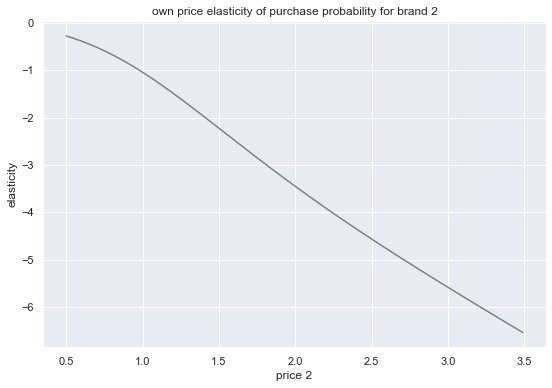

In [22]:
plt.figure(figsize = (9,6))
plt.plot(price_range, own_price_elasticity_brand_2, color = 'grey')
plt.xlabel('price 2')
plt.ylabel('elasticity')
plt.title('own price elasticity of purchase probability for brand 2')

In [24]:
df_brand2_cross_brand1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand2_cross_brand1['price 1'] = price_range
df_brand2_cross_brand1['price 2'] = brand_choice['Price_2'].mean()
df_brand2_cross_brand1['price 3'] = brand_choice['Price_3'].mean()
df_brand2_cross_brand1['price 4'] = brand_choice['Price_4'].mean()
df_brand2_cross_brand1['price 5'] = brand_choice['Price_5'].mean()


In [25]:
predict_brand2_cross_brand1 = model_brand_choice.predict_proba(df_brand2_cross_brand1)
pr_brand2_cross_brand1 = predict_brand2_cross_brand1[: ][:,0]

price_elasticity_brand2_cross_brand1 = -beta_5*price_range*pr_brand2_cross_brand1

df_price_elasticities['Brand_2 cross Brand_1'] = price_elasticity_brand2_cross_brand1
pd.options.display.max_rows = None
df_price_elasticities

,0,Brand_2,Brand_2 cross Brand_1
0,0.50,-0.276150,0.800750
1,0.51,-0.286045,0.811104
2,0.52,-0.296151,0.821047
3,0.53,-0.306469,0.830567
4,0.54,-0.317002,0.839648
5,0.55,-0.327751,0.848277
6,0.56,-0.338718,0.856442
7,0.57,-0.349904,0.864129
8,0.58,-0.361310,0.871324
9,0.59,-0.372938,0.878016


Text(0.5, 1.0, 'price elasticity of brand 2 wr brand1')

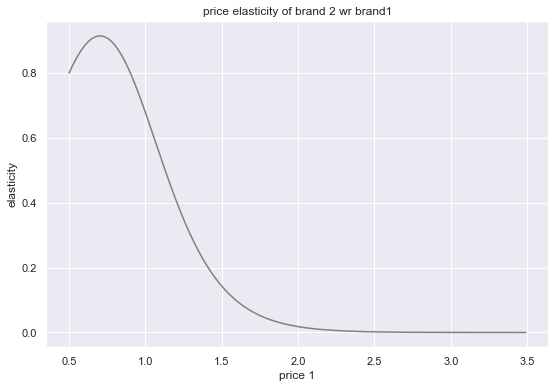

In [27]:
plt.figure(figsize = (9,6))
plt.plot(price_range, price_elasticity_brand2_cross_brand1, color = 'grey')
plt.xlabel('price 1')
plt.ylabel('elasticity')
plt.title('price elasticity of brand 2 wr brand1')

In [38]:
brand_choice_s0 = df_pa[df_pa["Incidence"]==1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment']==0]

Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial',max_iter = 300)
model_brand_choice_s0.fit(X,Y)

bc_coef_s0 = pd.DataFrame(model_brand_choice_s0.coef_)
bc_coef_s0 = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
coef = ['coef brand 1','coef brand 2','coef brand 3','coef brand 4','coef brand 5']
bc_coef_s0.columns = [coef]
brands = ['price 1','price 2','price 3','price 4','price 5']
bc_coef_s0.index = [brands]
bc_coef_s0 = bc_coef_s0.round(2)

predict_own_brand_2_s0 = model_brand_choice_s0.predict_proba(df_own_brand_2)
pr_own_brand_2_s0 = predict_own_brand_2_s0[: ][:,1]
beta_5 = bc_coef.iloc[1,1]
own_price_elasticity_brand_2_s0 = beta_5*price_range*(1-pr_own_brand_2_s0)

df_price_elasticities['Brand_2 seg 0'] = own_price_elasticity_brand_2_s0
pd.options.display.max_rows = None
df_price_elasticities

df_own_brand_2_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_2_s0['price 1'] = brand_choice['Price_1'].mean()
df_own_brand_2_s0['price 2'] = brand_choice['Price_2'].mean()
df_own_brand_2_s0['price 3'] = brand_choice['Price_3'].mean()
df_own_brand_2_s0['price 4'] = brand_choice['Price_4'].mean()
df_own_brand_2_s0['price 5'] = price_range

predict_brand2_cross_brand1_s0 = model_brand_choice_s0.predict_proba(df_brand2_cross_brand1)
pr_brand2_cross_brand1_s0 = predict_brand2_cross_brand1_s0[: ][:,1]

price_elasticity_brand2_cross_brand1_s0 = -beta_5*price_range*pr_brand2_cross_brand1_s0

df_price_elasticities['Brand_2 cross Brand_1 seg 0'] = price_elasticity_brand2_cross_brand1_s0
pd.options.display.max_rows = None
df_price_elasticities

,0,Brand_2,Brand_2 cross Brand_1,Brand_5 seg 0,Brand_2 cross Brand_1 seg 0
0,0.50,-0.276150,0.800750,-0.251793,0.039824
1,0.51,-0.286045,0.811104,-0.261677,0.042127
2,0.52,-0.296151,0.821047,-0.271810,0.044538
3,0.53,-0.306469,0.830567,-0.282194,0.047062
4,0.54,-0.317002,0.839648,-0.292831,0.049704
5,0.55,-0.327751,0.848277,-0.303724,0.052467
6,0.56,-0.338718,0.856442,-0.314876,0.055355
7,0.57,-0.349904,0.864129,-0.326288,0.058373
8,0.58,-0.361310,0.871324,-0.337964,0.061525
9,0.59,-0.372938,0.878016,-0.349904,0.064816


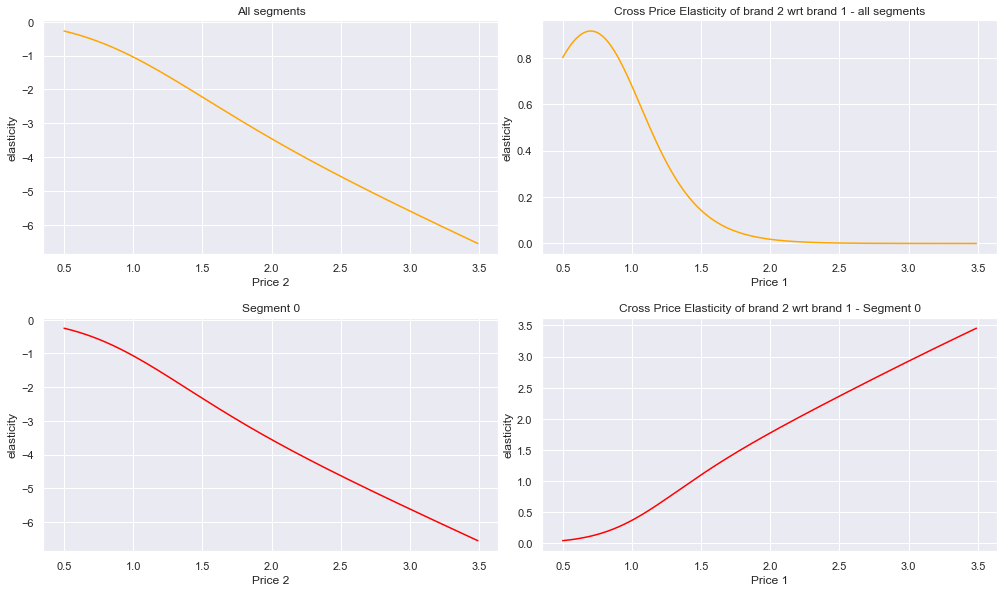

In [43]:
fig,axs = plt.subplots(2,2,figsize = (14,8))
fig.tight_layout(h_pad = 4)
axs[0,0].plot(price_range,own_price_elasticity_brand_2, color = 'orange')
axs[0,0].set_title('All segments')
axs[0,0].set_xlabel('Price 2')

axs[0,1].plot(price_range,price_elasticity_brand2_cross_brand1, color = 'orange')
axs[0,1].set_title('Cross Price Elasticity of brand 2 wrt brand 1 - all segments')
axs[0,1].set_xlabel('Price 1')

axs[1,0].plot(price_range,own_price_elasticity_brand_2_s0, color = 'red')
axs[1,0].set_title('Segment 0')
axs[1,0].set_xlabel('Price 2')

axs[1,1].plot(price_range,price_elasticity_brand2_cross_brand1_s0, color = 'red')
axs[1,1].set_title('Cross Price Elasticity of brand 2 wrt brand 1 - Segment 0')
axs[1,1].set_xlabel('Price 1')
for axs in axs.flat:
    axs.set_ylabel('elasticity')